# Hierarchical Clustering in Python #

Killian McKee

## Overview ## 

1. [What is Hierarchical Clustering?](#section1)
2. [Key Terms](#section2) 
3. [Pros and Cons of Hierarchical Clustering](#section3)
4. [When to use Hierarchical Clustering](#section4)
5. [Key Parameters](#section5) 
6. [Walkthrough: Building a Hierchichal clustering model](#section6)
7. [Additional Resources](#section7) 
8. [Conclusion](#section8)
9. [Sources](#section9)

<a id='section1'></a>

## What is Hierarchical Clustering? ##

Hierarchichal clustering is an unsupervised machine learning technique used to split data into distinct, similar subgroups. This can be useful in settings where one wants to better understand their customer demographics, identify patient subgroups, find outlying data points, or to better understand the underlying structure of data. Their are two types of hierarchical clustering: divisive and agglomerative. Divisive clustering starts from the top down and initially treats all the data points as one cluster. Subsequent clusters are formed by dividing the first cluster based on one of several selectable similarity criteria. This guide will focus on agglomerative clustering, which is much more common than divisive in practice. Agglomerative clustering works from the bottom up by treating each data point as a 'cluster' and then combining clusters with their next most similar cluster until one large cluster is formed. Hierarchical clustering models track where each of these cluster combinations take place to form a dendrogram, which is a tree like structure. Next, the dendrogram is used as a reference to break the single large cluster into the desired number of subgroups. Here are the steps for agglomerative hierarchical clustering explicitly defined:

1. Treat each data point as a cluster where k is the total number of data points/initial clusters
2. Combine the two closest points into a new cluster. This results in k-1 clusters. 
3. Form additional clusters by joining the next two closest clusters. This results in k-2 clusters. 
4. Repeat steps 1-3 until there is only one big cluster remaining. 
5. Divide the single cluster into sub-clusters using the dendrogram generated during the cluster combinations. Users can decide how many clusters are appropriate based on the dendrogram, or an optimization algorithm (less common because of resource intensity and clarity of most dendrograms). 

The 'closeness' of points mentioned in steps 2 and 3 above can be determined a few different ways using either euclidean or manhattan distance:

1. Measure the distance between the two closest points of each cluster (also called single linkage). 
2. Measure the distance between the two furthest points of each cluster (maximum/complete linkage). 
3. Measure the distance between the two centroids of each cluster (ward linkage).
4. Measure the distance between all the points of in each cluster and take the average (average linkage). 

<img src='hierarch.gif'>

<a id='section2'></a>

## Key Terms ##

1. **Clustering**: Unsupervised learning technique to find non-overlapping subgroups within a dataset. Commonly used to find customer or patient groups, analomies, or to get a general data visualization.
2. **Centroid**: The average center of mass within a cluster. Used to help determine what observation in a dataset belongs in which cluster. 
3. **Agglomerative Hierarchical Clustering**: Bottom up techique where each data point is initially treated as a cluster (see gif above). A dendrogram is formed while clusters are being formed to create future divisions. Most commonly used type of hierchical clustering. 
4. **Dendrogram**: A tree like diagram that shows the hierarchical relationships between objects (see above  gif, right side).

<a id='section3'></a>

## Pros and Cons of Hierarchical Clustering ##

### Pros ### 

1. **Makes Few Assumptions about Data**: Unlike k means clustering, hierarchical clustering does not require users to specify the number of clusters they want early in the process. 
2. **Handles Non-Globular Data**: Hierarchical clustering can better handle noisy or non-globularly shaped data than k means clustering. 
3. **Easy to Understand/Implement**: Dendrograms make it easy to understand and interpret hierarchical clustering models. Packages like scikit-learn also make it easy to implement a hierarchical clustering model. 

### Cons ### 

1. **Computationally Expensive**: Hierarchical clustering models are too computationally expensive to work quickly on large data sets. K means cluserting is a superior option in most big data situations. 
2. **Order and Initial Seed Impacts Final Results**: The order of the data and the way in which the seeds are initialized can change the final results of model performance significantly. 
3. **Very Sensitive to Outliers**: Hierarchical clustering can be adversely affected by outliers. 

<a id='section4'></a>

## When to use Hierarchical Clustering ##

Hierarchical clustering works well on relatively tidy, small to medium sized datasets. It can handle more data shapes than k means clustering, but is more prone to being thrown off by outliers. Additionally, hierarchical clustering merits consideration when one isn't sure how many clusters to specify intially (a requirement of k means clustering) since dendrograms can give good insights into an appropriate number. 

<a id='section5'></a>

## Key Parameters ##

**n_clusters**: The number of clusters to use, should be the same as the number of data points initially. 
**linkage**: This can be one of te four closeness measures specified above. Generally speaking:
   - Single linkage is fast and effective on non-globular data, but severly afflicted by noise. 
   - Average and complete linkage are accurate on cleanly separated data, but have variable results otherwise. 
   - Ward most effectively manages noisy data

<a id='section6'></a>

## Walkthrough: Building a Hierarchical Clustering Model in Python ##

This tutorial walks through how we could use hierarchical clustering to identify different customer spending groups using a ward linkage. The following steps are performed:

1. Import the necessary packages and load the dataset. 
2. Examine the data.
3. Create a dendrogram to decide how many clusters to use.
4. Fit our agglomerative clustering model using a ward linkage.
5. Plot and display a visualization of our clusters.

In [1]:
# import necessary packages 

import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
# read in our dataset 

cust_data=pd.read_csv('shopping_data.csv')

In [3]:
# some basic data exploration 

print('data shape:',cust_data.shape)
print('top 5 rows:',cust_data.head(5))

data shape: (200, 5)
top 5 rows:    CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [10]:
# remove the first three columns 
# clustering will be done on last 2 columns in a 2D feature space 

data=cust_data.iloc[:,3:5].values

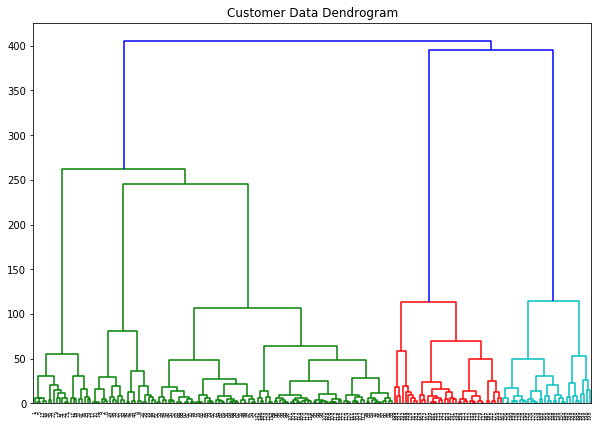

In [11]:
# generate a dendrogram for our data using scipy 
# this will help us decide how many clusters to form 
# we can see that if we drew a line across the middle we would end up with 5 distinct clusters
# more info on dendrograms in the additional sources section

plt.figure(figsize=(10,7))
plt.title('Customer Data Dendrogram')
dendro=sch.dendrogram(sch.linkage(data,method='ward'))


In [12]:
# building our hierarchical clustering model 
# we will be using a ward linkage since the data is slightly noisy
# this will output an array with a number from 0-n_clusters

cluster=AgglomerativeClustering(n_clusters=5, affinity='euclidean',linkage='ward')
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

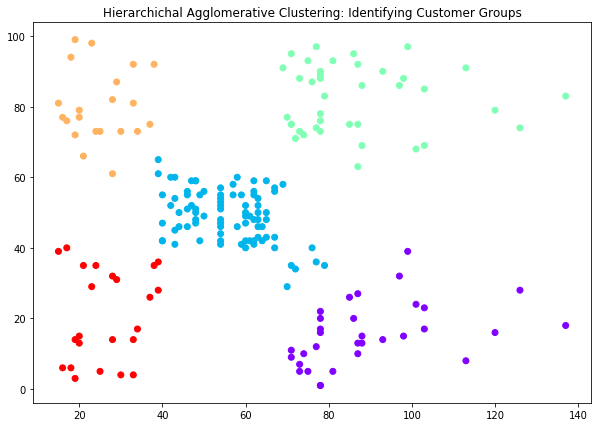

In [14]:
# plot the output of our clustered data

plt.figure(figsize=(10, 7))
plt.title('Hierarchichal Agglomerative Clustering: Identifying Customer Groups')
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')  

<a id='section7'></a>

## Additional Resources ##

1. [In depth on dendrograms and hierarchical clustering](https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Hierarchical_Clustering-Dendrograms.pdf)
2. [Stanford lecture on hierachical clustering](https://www.youtube.com/watch?v=rg2cjfMsCk4)

<a id='section8'></a>

## Conclusion ##

This guide covered hierchical clustering. After defining some key terms and getting a general overview of hierarchical clustering, we covered some of the pros and cons of this method. Next, we discussed relevant programming parameters and then built our own algorithm to cluster customers with similar spending habits. Ultimately, hierchical clustering provides us with an alternative to k-means clustering for small-medium sized datasets or the ideal number of clusters is called into doubt. 

<a id='section9'></a>

## Sources ##

1. https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/
2. https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/
3. https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html#sphx-glr-auto-examples-cluster-plot-linkage-comparison-py
4. https://drive.google.com/file/d/18Dsja5_1jRY1GnWoORXFFKGTJhylk6rJ/view
5. https://www.youtube.com/watch?v=rg2cjfMsCk4
6. https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Hierarchical_Clustering-Dendrograms.pdf